<a href="https://colab.research.google.com/github/NattachaiJairak/DADS6003/blob/main/Lab3%20by%20Tum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate linear regresion


In [9]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.1 MB/s eta 0:00:00
time: 331 µs (started: 2024-02-09 08:52:44 +00:00)


## 1.1 Normal equation (Numpy version)

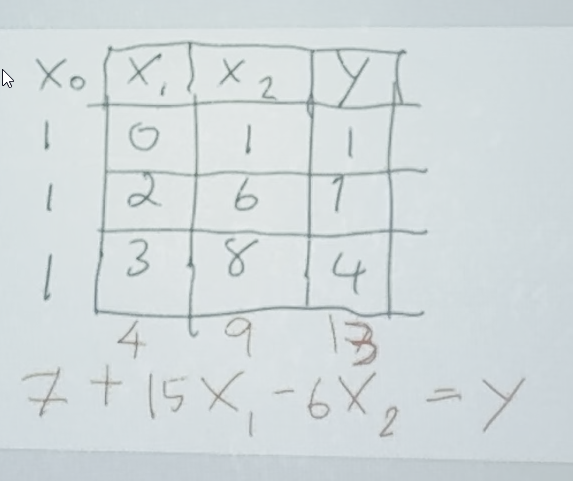

theta =  [ 0.71  0.54 -0.34  0.63]
y predict =  [6.09]
data =  [(0, 1), (2, 1), (3, 4), (5, 6)]


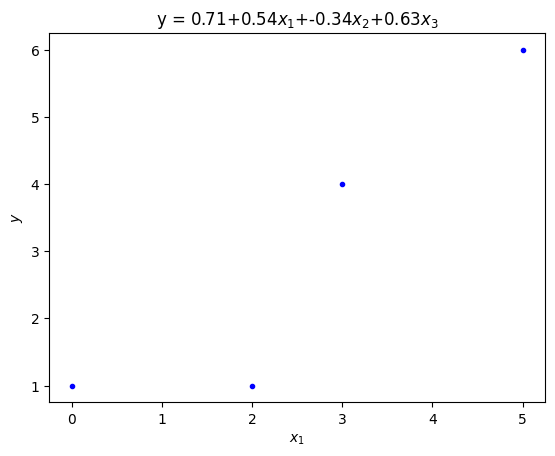

time: 932 ms (started: 2024-02-09 08:56:33 +00:00)


In [20]:
import numpy as np
np.set_printoptions(precision=2)
from sklearn.datasets import make_regression

#x, y = make_regression(n_samples=10, n_features=4, noise=2, random_state=123)
#x = np.array([[0,2,3],[1,6,8]]).T
x = np.array([[0,1,1],[2,6,2],[3,8,7],[5,9,9]]) #x1, x2, x3
y = np.array([1,1,4,6])

x_b = np.c_[np.ones((x.shape[0],1)),x]
#print("x_b = ", x_b)

#call inverse function from linear algebra module
theta = np.linalg.pinv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print("theta = ", theta)

#predict trainned x
xtest = np.array([[4,9,10]])
xtest_b = np.c_[np.ones((xtest.shape[0],1)),xtest]
y_p = xtest_b.dot(theta)
print("y predict = ",y_p)

import matplotlib.pyplot as plt

#Create the title
exp = ""
plus = "+"
for t in range(len(theta)):
  if t == len(theta)-1:
    plus = ""
  if t == 0:
    xterm = ""
  else:
    xterm = r"$x_"+str(t)+"$"
  exp += str(np.round(theta[t],2)) + xterm + plus
#end create the title

plt.title("y = "+exp)
data = sorted(zip(x[:,0],y))
print("data = ", data)
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

plt.plot(x_val, y_val, "b.")
#plt.plot(x_val, y_p,"r.")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$y$')

plt.show()


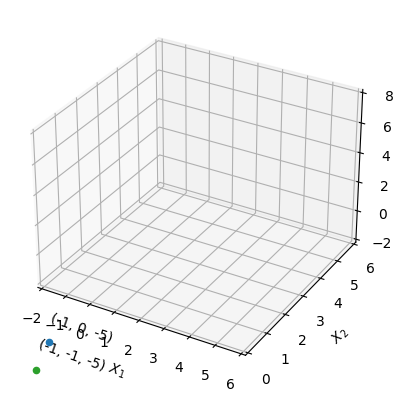

time: 343 ms (started: 2024-02-09 08:52:44 +00:00)


In [11]:
ax = plt.figure().add_subplot(projection='3d')

#ax.scatter(x[:,0], x[:,1], zs=y)
xs = x[:,0]
ys = x[:,1]
zs = y

for x1, x2, _y in zip(xs, ys, zs):
  label = '(%d, %d, %d)' % (x1, x2, _y)
  ax.text(x1, x2, _y, label, 'x')
  ax.scatter(x1, x2, zs=_y)

ax.set_xlim(-2, 6)
ax.set_ylim(0, 6)
ax.set_zlim(-2, 8)
ax.set_xlabel(r'$X_1$')
ax.set_ylabel(r'$X_2$')
ax.set_zlabel('Y')

plt.show()

Exercise1 <br>
1.1 Change a number of features to 4 (x1,x2,x3,x4) and plot 4 graphs </br>
1.2 Change a number of features to 2 (x1,x2) and use plotly to plot 3D visualization (x1,x2,y).

# **Sklearn**

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.intercept_, " , ", lin_reg.coef_)

#prediction
#x_n = np.array([[-3,3],[5,2]])
y_p = lin_reg.predict(xtest)
print("y predict = ",y_p)

0.71428571428571  ,  [ 0.54 -0.34  0.63]
y predict =  [6.09]
time: 7.7 ms (started: 2024-02-09 08:56:42 +00:00)


# **Batch Gradient descent (Multiple linear regression)**


In [13]:
def cost_function(theta, x, y, N):
  #print("In cost function.")
  #print("       theta.shape = ",theta.shape)
  #print("       x.shape = ",x.shape)
  y_hat = x.dot(theta)
  #print("       y_hat.shape = ",y_hat.shape)
  c = (1/(2*N))*np.sum((y_hat-y)**2)
  #print("       c.shape = ",c.shape, " c = ",c)
  #print("End cost function.")
  return c

time: 713 µs (started: 2024-02-09 08:52:45 +00:00)


In [27]:
def gradient_descent(alpha, x, y, ep=0.001, max_iter=10000):
  converged = False
  iter = 0
  N = x.shape[0] # number of samples
  print("Num of data = ",N)

  # initial theta
  #theta =  np.ones((x.shape[1],1)) #For debug
  theta =  np.random.random((x.shape[1],1))
  print("Init theta.shape = ",theta.shape)

  # total error, J(theta)
  J = cost_function(theta, x, y, N)
  print("First J = ",J)

  # Iterate Loop
  while not converged:

    #print("Converged at iter = ",iter)
    #y_hat = theta.T.dot(x) Why this line doesn't work?????????????
    y_hat = x.dot(theta)
    #print("       y_hat = ",y_hat, " y_hat.shape = ",y_hat.shape)
    diff = y_hat - y
    #print("       diff = ",diff, " diff.shape = ",diff.shape)
    grad = x.T.dot(diff) #Why this line use Transpose function ??????
    #print("       grad = ",grad, " grad.shape = ",grad.shape)

    theta = theta - alpha * (1/N) * (grad)

    assert theta.shape == (4,1) #This line makes sure that the shape of theta is still be the same.

    # error
    J2 = cost_function(theta, x, y, N)

    if abs(J-J2) <= ep:
        print("       Converged, iterations: ", iter, "/", max_iter)
        converged = True

    J = J2   # update error s
    iter += 1  # update iter

    if iter == max_iter:
        print('       Max iterations exceeded!')
        converged = True

  #print("End converged iter = ",iter)
  return theta

time: 965 µs (started: 2024-02-09 08:59:49 +00:00)


In [28]:
if __name__ == '__main__':

  print("start main")
  print(x_b.shape)
  y = y.reshape(-1,1)
  print(y.shape)

  alpha = 0.01 # learning rate
  #Training process
  theta = gradient_descent(alpha, x_b, y, ep=0.000000000001, max_iter=1000000)
  print ("Theta = ", theta)

  #predict trainned x
  xtest = np.array([[4,9,10]])
  xtest_b = np.c_[np.ones((xtest.shape[0],1)),xtest]
  y_p = xtest_b.dot(theta)
  print("y predict = ",y_p)



start main
(4, 4)
(4, 1)
Num of data =  4
Init theta.shape =  (4, 1)
First J =  2.029102072211157
       Converged, iterations:  8982 / 1000000
Theta =  [[ 0.71]
 [ 0.54]
 [-0.34]
 [ 0.63]]
y predict =  [[6.09]]
time: 143 ms (started: 2024-02-09 08:59:52 +00:00)


# Stochastic GD
## Your turn :)

# Mini-batch GD
## Your turn :)

# Polynomial regression
Reference: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week03-MLR/Position_Salaries.csv')
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values
print(df.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
time: 338 ms (started: 2024-02-09 09:30:56 +00:00)


In [70]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

time: 3.55 ms (started: 2024-02-09 09:30:57 +00:00)


In [71]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
time: 1.81 ms (started: 2024-02-09 09:31:00 +00:00)


In [72]:
print(lin_reg.intercept_, " , ", lin_reg.coef_)

-195333.33333333337  ,  [80878.79]
time: 4.89 ms (started: 2024-02-09 09:31:02 +00:00)


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


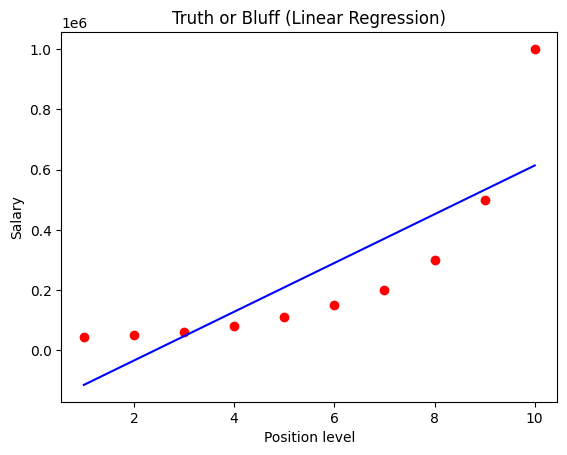

time: 244 ms (started: 2024-02-09 09:31:11 +00:00)


In [73]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(y)
# Visualizing the Linear Regression results

plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


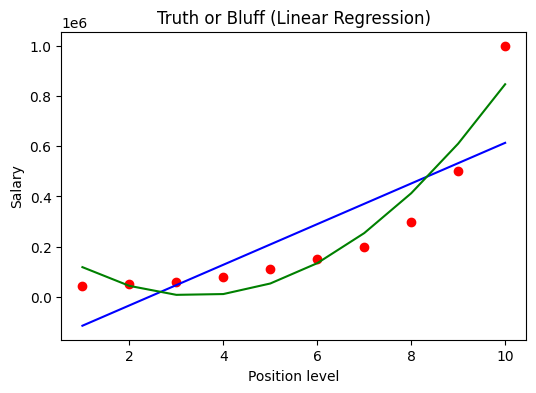

time: 234 ms (started: 2024-02-09 09:34:39 +00:00)


In [77]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
print(X_poly)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.plot(X, pol_reg.predict(X_poly), color='green')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [54]:
print(pol_reg.intercept_, " , ", pol_reg.coef_)

232166.6666666664  ,  [      0.   -132871.21   19431.82]
time: 1.08 ms (started: 2024-02-09 09:13:07 +00:00)


In [62]:
# Predicting a new result with Linear Regression
print(lin_reg.predict([[5.5]]))
#output should be 249500

# Predicting a new result with Polymonial Regression
print(pol_reg.predict(poly_reg.fit_transform([[5.5]])))
#output should be 132148.43750003

[249500.]
[89187.5]
time: 16.3 ms (started: 2024-02-09 09:21:50 +00:00)


In [74]:
from sklearn.metrics import mean_squared_error
# Calculating the mean squared error

mse = mean_squared_error(y, lin_reg.predict(X))
result = "{:,.2f}".format(mse)
result

'26,695,878,787.88'

time: 6.11 ms (started: 2024-02-09 09:31:23 +00:00)


In [75]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

time: 5.01 ms (started: 2024-02-09 09:31:47 +00:00)


In [76]:
lin_reg.predict(X)

array([-114454.55,  -33575.76,   47303.03,  128181.82,  209060.61,
        289939.39,  370818.18,  451696.97,  532575.76,  613454.55])

time: 5.63 ms (started: 2024-02-09 09:31:57 +00:00)


In [78]:
from sklearn.metrics import mean_squared_error
# Calculating the mean squared error

mse = mean_squared_error(y,pol_reg.predict(X_poly))
result = "{:,.2f}".format(mse)
result

'6,758,833,333.33'

time: 5.23 ms (started: 2024-02-09 09:34:58 +00:00)
